In [1]:
import torch

In [4]:
t1 = torch.tensor([2,2])

In [5]:
t1.ndim

1

In [13]:
t2 = torch.tensor([[2,2],[2,3]])

In [7]:
t2

tensor([[2, 2],
        [2, 3]])

In [14]:
t2.add(2)

tensor([[4, 4],
        [4, 5]])

In [15]:
t2

tensor([[2, 2],
        [2, 3]])

In [16]:
t2.add_(3)

tensor([[5, 5],
        [5, 6]])

In [17]:
t2

tensor([[5, 5],
        [5, 6]])

In [20]:
t2.shape

torch.Size([2, 2])

In [21]:
torch.zeros(2,3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [23]:
tn= torch.zeros(3,4,5,6,7)

In [24]:
tn.shape

torch.Size([3, 4, 5, 6, 7])

In [27]:
tn.ndim

5

In [28]:
tn.sum()

tensor(0.)

In [29]:
trand = torch.rand_like(tn)

In [30]:
trand.shape

torch.Size([3, 4, 5, 6, 7])

In [31]:
trand.sum()

tensor(1266.7642)

In [36]:
trand + trand

tensor([[[[[1.6334e+00, 1.5755e+00, 4.6636e-03,  ..., 1.4180e+00,
            1.2633e+00, 1.5120e+00],
           [1.5942e+00, 5.5960e-01, 1.0610e+00,  ..., 1.3853e+00,
            3.0583e-01, 9.4211e-01],
           [6.2939e-01, 9.6529e-01, 1.0926e+00,  ..., 3.4037e-01,
            5.5712e-01, 1.9167e+00],
           [3.0872e-01, 1.1303e+00, 6.5177e-01,  ..., 6.3842e-01,
            7.1608e-01, 9.6428e-03],
           [5.1397e-01, 1.0792e+00, 1.7121e+00,  ..., 3.5176e-01,
            6.3449e-01, 1.0745e+00],
           [5.2443e-01, 6.0239e-01, 1.1725e-01,  ..., 1.4933e-01,
            1.2846e+00, 9.7683e-01]],

          [[6.9745e-01, 9.1594e-01, 1.2099e+00,  ..., 1.8980e+00,
            9.8749e-01, 6.1813e-01],
           [2.9712e-01, 1.5664e-01, 6.7703e-01,  ..., 1.9156e+00,
            5.1963e-01, 1.8359e+00],
           [1.8691e+00, 1.6323e+00, 6.4110e-02,  ..., 7.5598e-01,
            1.7854e+00, 1.4341e+00],
           [1.3803e+00, 5.1201e-01, 1.5539e-01,  ..., 2.8503e-01,
     

In [38]:
trand_mul = trand * trand

In [39]:
trand_mul.shape

torch.Size([3, 4, 5, 6, 7])

In [40]:
trand.device

device(type='cpu')

In [43]:
trand_mps = trand.to('mps')

In [45]:
trand_mps.device

device(type='mps', index=0)

In [13]:
import torchvision
import torchvision.datasets as ds
import torchvision.utils
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [7]:
train_data=ds.FashionMNIST(root="data",train=True,download=True,transform=ToTensor())
test_data=ds.FashionMNIST(root="data",train=True,download=True,transform=ToTensor())

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 26.4M/26.4M [00:17<00:00, 1.52MB/s]
100%|███████████████████████████████████████████████████████████████████████████████████████████████| 29.5k/29.5k [00:00<00:00, 140kB/s]
100%|███████████████████████████████████████████████████████████████████████████████████████████████| 4.42M/4.42M [00:05<00:00, 816kB/s]
100%|██████████████████████████████████████████████████████████████████████████████████████████████| 5.15k/5.15k [00:00<00:00, 8.89MB/s]


In [8]:
img, label = train_data[0]

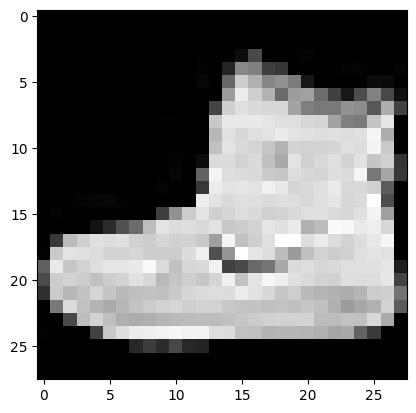

In [12]:
plt.imshow(img.squeeze(),cmap="gray")

In [17]:
from torch.utils.data import DataLoader
test_data_set=DataLoader(train_data,batch_size=64,shuffle=True)

In [28]:
test_data_from_ds=

In [34]:
train_features, train_labels = next(iter(test_data_set))

In [38]:
train_features.shape

torch.Size([64, 1, 28, 28])

In [43]:
import time

# Simple CNN-like operation
conv = torch.nn.Conv2d(1, 32, kernel_size=3, padding=1)

x_cpu = train_features.to("cpu")
conv_cpu = conv.to("cpu")

start = time.time()
for _ in range(100):  # repeat to make time visible
    y_cpu = conv_cpu(x_cpu)
end = time.time()

print("CPU time:", end - start)


<IPython.core.display.Javascript object>

CPU time: 0.1361527442932129


In [44]:
if torch.backends.mps.is_available():
    x_mps = train_features.to("mps")
    conv_mps = conv.to("mps")

    start = time.time()
    for _ in range(100):
        y_mps = conv_mps(x_mps)

    # IMPORTANT: synchronize GPU before timing
    torch.mps.synchronize()

    end = time.time()
    print("MPS time:", end - start)
else:
    print("MPS not available")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MPS time: 0.01877903938293457
